# Mathematical Underpinnings - Lab 4

In [6]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import crosstab
from scipy.stats import chi2,chisquare
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [7]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [8]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

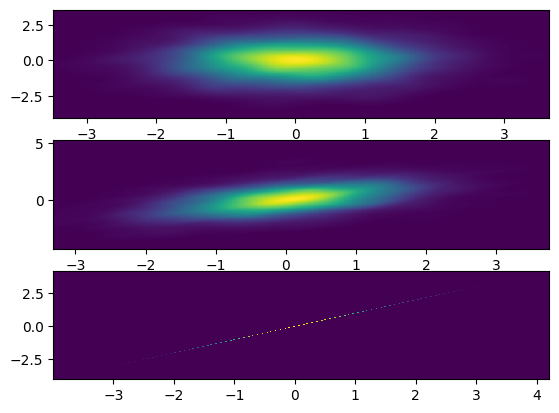

In [9]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [10]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [11]:
n = 1000
p = 0.5
XY = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
X = XY[:,0]
Y = XY[:,1]

In [12]:
prs = pearsonr(X,Y)

In [13]:
prs.correlation

0.4768518918204957

In [14]:
X_d = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10))

In [15]:
mutual_info_score(X_d,Y_d)

0.15613134507121568

In [16]:
def test_rho(rho, times = 100, n = 1000):
    pearsons = []
    miss = []
    for _ in range(times):
        XY = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
        X = XY[:,0]
        Y = XY[:,1]
        prs = pearsonr(X,Y).correlation
        X_d = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
        Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10))
        mis = mutual_info_score(X_d,Y_d)
        pearsons = [*pearsons, prs]
        miss = [*miss, mis]
    return pd.DataFrame({"Corr": pearsons, "MIS": miss, "Rho": rho})

In [17]:
results = pd.concat([test_rho(rho) for rho in [0.1, 0.25, 0.5, 0.75, 0.95]])

In [18]:
results["Rho_str"] = results.Rho.astype(str)

In [19]:
import plotly.express as px
fig = px.box(results, x="Rho_str", y="Corr")
fig.show()
fig = px.box(results, x="Rho_str", y="MIS")
fig.show()

In [20]:
results["Rho_transformed"] = -np.log(1 - results["Rho"]**2)/2
results["Rho_transformed_est"] = -np.log(1 - results["Corr"]**2)/2

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [21]:
fig = px.scatter(results, x="Rho_transformed", y="MIS")
fig.show()

In [22]:
fig = px.scatter(results, x="Rho_transformed_est", y="MIS")
fig.show()

### b)

#### bp 1)

In [23]:
# again: this is too time consuming so here is an answer

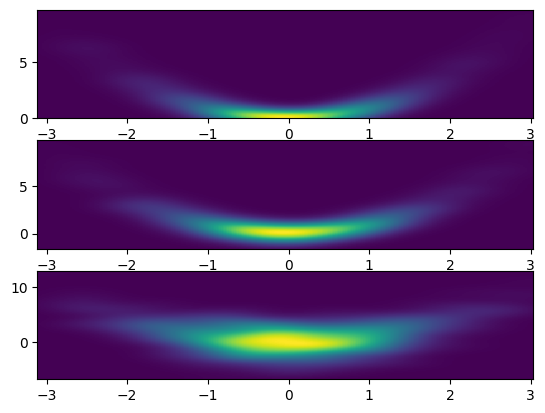

In [24]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

In [25]:
def gen_XY(sigma, n=1000):
    x = np.random.normal(0, 1, n)
    y = x**2 + np.random.normal(0, 0, n)
    return (x,y)

In [26]:
X,Y = gen_XY(0.5)

In [27]:
def test_sigma(sigma, times = 100, n = 1000):
    pearsons = []
    miss = []
    for _ in range(times):
        X,Y = gen_XY(sigma)
        prs = pearsonr(X,Y).correlation
        X_d = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
        Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10))
        mis = mutual_info_score(X_d,Y_d)
        pearsons = [*pearsons, prs]
        miss = [*miss, mis]
    return pd.DataFrame({"Corr": pearsons, "MIS": miss, "Sigma": sigma})

In [28]:
results = pd.concat([test_sigma(sigma) for sigma in [0, 0.25, 0.5, 1, 2]])

In [29]:
results["Sigma_str"] = results.Sigma.astype(str)

In [30]:
import plotly.express as px
fig = px.box(results, x="Sigma_str", y="Corr")
fig.show()
fig = px.box(results, x="Sigma_str", y="MIS")
fig.show()

#### bp 2) and 3)

In [109]:
def gen_sample(rho = 0):
    XY = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
    X = XY[:,0]
    Y = XY[:,1]
    return (X,Y)

## Task 2

### a)

In [99]:
def asymp_ind(X,Y, stats = "mi"):
    X_d = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
    Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10))
    if stats == "mi":
        mi = mutual_info_score(X_d,Y_d)
        stat = 2 * len(X) * mi
    else:
        stat = chi2_contingency(crosstab(X_d, Y_d).count).statistic
    df = (len(np.unique(X_d)) - 1) * (len(np.unique(Y_d)) - 1)
    pval = chi2.sf(stat, df)
    return {"pval": pval, "statistic": stat}

### b)

In [81]:
def perm_ind(X,Y, B = 1000):
    mi_b = np.array([])
    X_d_ori = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
    Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10))
    mi = mutual_info_score(X_d_ori,Y_d)
    for _ in range(B):
        X_d = np.random.permutation(X_d_ori)
        mi_per = mutual_info_score(X_d,Y_d)
        mi_b = [*mi_b, mi_per]
    pval = (1 + np.sum(mi<mi_b))/(1 + B)
    return {"pval": pval, "statistic": mi}

In [108]:
rho = 0.2
XY = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
X = XY[:,0]
Y = XY[:,1]
perm_ind(X,Y)

{'pval': 0.023976023976023976, 'statistic': 0.04048109391352776}

### c)

In [ ]:
X, Y = gen_sample(rho=0)
print(f"Independent sample: {asymp_ind(X,Y, stats = 'chi')}")
X, Y = gen_sample(rho=0.5)
print(f"Dependent sample, rho = 0.5: {asymp_ind(X,Y, stats = 'chi')}")


Independent sample: {'pval': 0.9580998635748594, 'statistic': 60.37763747937583}
Dependent sample, rho = 0.5: {'pval': 4.482364441541971e-87, 'statistic': 636.1936331406197}


In [ ]:
X, Y = gen_sample(rho=0)
print(f"Independent sample: {asymp_ind(X,Y, stats = 'mi')}")
X, Y = gen_sample(rho=0.5)
print(f"Dependent sample, rho = 0.5: {asymp_ind(X,Y, stats = 'mi')}")


Independent sample: {'pval': 0.9822415550645336, 'statistic': 56.563176479457425}
Dependent sample, rho = 0.5: {'pval': 3.238339057944397e-30, 'statistic': 320.4756930204335}


In [ ]:
X, Y = gen_sample(rho=0)
print(f"Independent sample: {perm_ind(X,Y)}")
X, Y = gen_sample(rho=0.5)
print(f"Dependent sample, rho = 0.5: {perm_ind(X,Y)}")


Independent sample: {'pval': 0.2787212787212787, 'statistic': 0.03706965197783367}
Dependent sample, rho = 0.5: {'pval': 0.000999000999000999, 'statistic': 0.12708365971053873}
